In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("C:\online-retail-analysis\data\online_retail.csv")


In [3]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [4]:
df = df.dropna(subset=["CustomerID"])

In [5]:
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]


In [6]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["CustomerID"] = df["CustomerID"].astype(int)


In [7]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]


In [8]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")


In [9]:
monthly_revenue = df.groupby("Month")["Revenue"].sum()


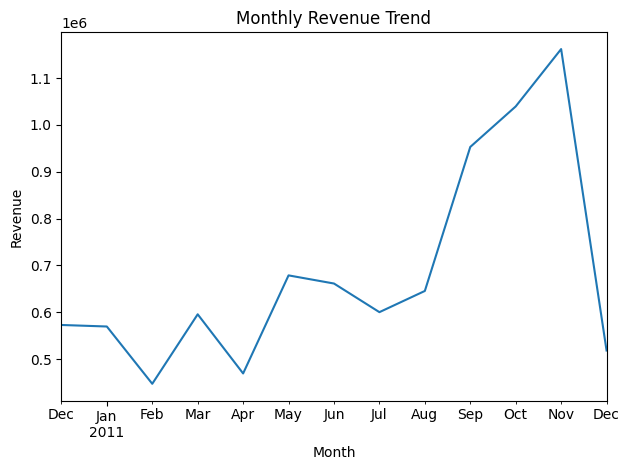

In [10]:
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("charts/monthly_revenue.png")
plt.show()


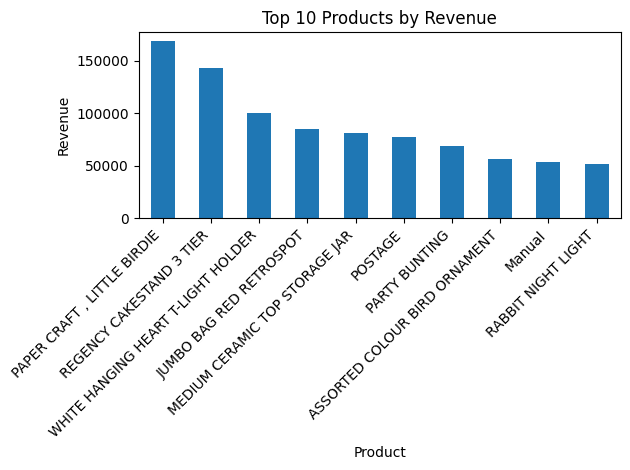

In [11]:
top_products = (
    df.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("charts/top_products.png")
plt.show()


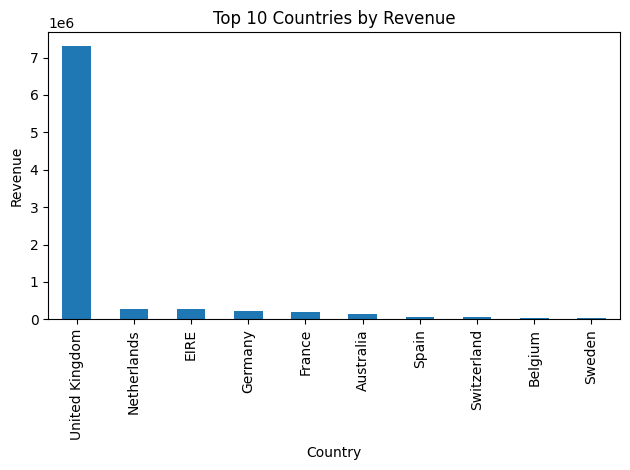

In [12]:
revenue_country = (
    df.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

revenue_country.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("charts/revenue_by_country.png")
plt.show()
